In [46]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
import seaborn as sns
import pandas as pd
from environment.TheoreticalMarket import *


In [47]:
filename = "sim_results/market-marl-nash-3-05-06-2022-22-31-3440_results.pkl"

with open(filename, 'rb') as f:
    res = pkl.load(f)

sns.set_theme(style="darkgrid")
data_losses = {"Q Function Loss": res.losses, "Epsilon Function Loss": res.losses_eps, "Nash Net Loss": res.losses_nash}
data_losses_df = pd.DataFrame(data=data_losses)
# sns.lineplot(data=data_losses_df)


In [48]:
res.marl_params

{'epochs': 40,
 'explore_epsilon': 0.05,
 'max_steps': 30,
 'sync_freq': 20,
 'mem_size': 101333,
 'turbo_max_evals': 5,
 'turbo_batch_size': 5,
 'turbo_n_init': 5,
 'batch_size': 10}

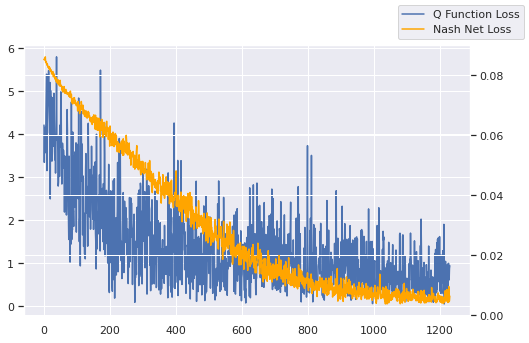

In [49]:
# import matplotlib.pyplot as plt

ax = data_losses_df.plot(y="Q Function Loss", legend=False, figsize=(8, 5))
ax2 = ax.twinx()

data_losses_df.plot(y="Nash Net Loss", ax=ax2, legend=False, color="orange")

# data_losses_df.plot(y="Epsilon Function Loss", ax=ax2, legend=False, color="red")
ax.figure.legend()


In [50]:
# import matplotlib.pyplot as plt
# sns.lineplot(data=res.losses, color="b", legend="auto")
# ax2 = plt.twinx()
# sns.lineplot(data=res.losses_eps, color="g", ax=ax2)

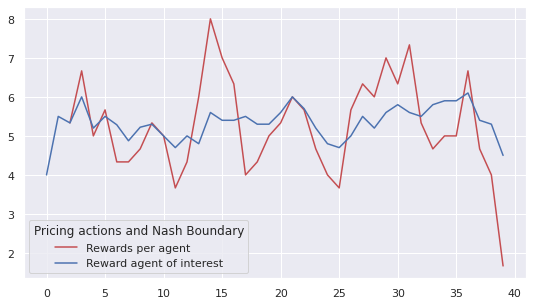

In [51]:
def moving_average(x, w=3):
    return np.convolve(x, np.ones(w), 'valid') / w

all_rewards = res.episode_rewards
agent_ind = 0
x = res.episode_rewards[:, -1, agent_ind]
smoothed_episode_rewards = moving_average(x)

# episode rewards all agents

sns.set()
x = np.arange(len(all_rewards))

# plt.plot(x, avg_ag_actions, 'b-', label='Average Agent Price')
# plt.plot(x, ref_prices, 'r--', label='Ref. Price')
plt.plot(x[2:], smoothed_episode_rewards, 'r', label='Rewards per agent')
plt.plot(x, res.avg_epoch_rewards_agent, 'b', label='Reward agent of interest')


plt.legend(title='Pricing actions and Nash Boundary')
plt.show()

<AxesSubplot:>

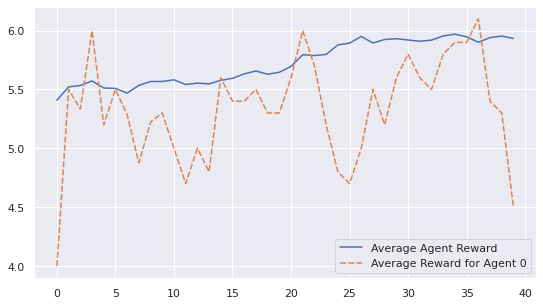

In [52]:
# Plot rewards

data_rewards = {"Average Agent Reward": res.avg_epoch_rewards, "Average Reward for Agent 0": res.avg_epoch_rewards_agent}
data_rewards_df = pd.DataFrame(data=data_rewards)

sns.set(rc={'figure.figsize':(9, 5)})
sns.lineplot(data=data_rewards_df)

In [53]:


# Theoretical Data
# tm = TheoreticalMarket(beta0 = 30, beta1 = -1.1, beta2 = -2, a = 0.1, ref_p = 1.5)
# beta0 = 25
# beta1 = -0.9
# beta2 = -1.1
# a = 0.1

# Market 2
# beta0 = 25
# beta1 = -0.6
# beta2 = -6.1
# a = 0.1

# Market 3
beta0 = 15
beta1 = -1.05
beta2 = -3.1
a = 0.1

# Config 4
# beta0 = 13
# beta1 = -5.05
# beta2 = -2.1
# a = 0.2

# Config 5
# beta0 = 27
# beta1 = -3.05
# beta2 = -1.1
# a = 0.2



# Simulation Data
ep = 31
# ref_prices = res.state_tracker_epoch[ep]
ref_prices = res.state_tracker[ep]

episode_rewards = res.episode_rewards[ep]

joint_actions = res.episode_actions
episode_joint_actions = joint_actions[ep]

prices = np.array([get_nash_eps_curve(r, beta0, beta1, beta2, a)[0] for r in ref_prices])
devs = np.array([get_nash_eps_curve(r, beta0, beta1, beta2, a)[1] for r in ref_prices])
demand = np.array([get_nash_eps_curve(r, beta0, beta1, beta2, a)[2] for r in ref_prices])

/home/larkin/code/dqn-marl/environment/TheoreticalMarket.py:43: RuntimeWarning: divide by zero encountered in double_scalars
  return (self.gamma / self.demand_func(x)) - (1 / x)
/home/larkin/code/dqn-marl/environment/TheoreticalMarket.py:47: RuntimeWarning: divide by zero encountered in double_scalars
  return self.gamma / (self.demand_func(x) * x )
/home/larkin/code/dqn-marl/environment/TheoreticalMarket.py:52: RuntimeWarning: invalid value encountered in double_scalars
  square_term = np.max([0, np.power(c1, 2) - c1 + 4*(c2 -1)*c2 - 2*c2])


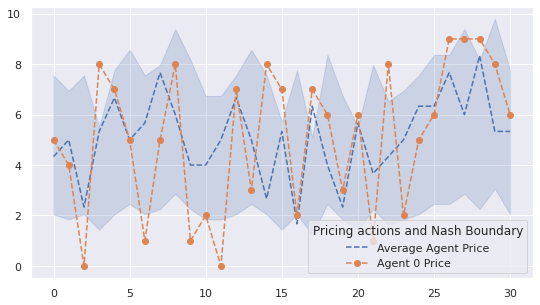

In [54]:

y = ref_prices
x = prices[0]
X, Y = np.meshgrid(x, y) 
z = devs

# min_eps_price, max_eps_price = get_eps0_range(9.9, Y, X, z)

nash_eps_bounds = [get_eps0_range(ref_price, Y, X, z) for ref_price in ref_prices ]
nash_lower_bound =  [v[0] for v in nash_eps_bounds]
nash_upper_bound =  [v[1] for v in nash_eps_bounds]

# Episode rewards 

avg_ag_rewards = episode_rewards.mean(axis = 1)
avg_ag_actions= episode_joint_actions.mean(axis = 1)
agent_interest_action = episode_joint_actions[:, 1]

sns.set()
x = np.arange(len(avg_ag_actions))

plt.plot(x, avg_ag_actions, '--', label='Average Agent Price')
# plt.plot(x, ref_prices, 'r--', label='Ref. Price')
# plt.plot(x, avg_ag_rewards, 'r--', label='Ref. Price')
plt.plot(x, agent_interest_action, 'o--', label='Agent 0 Price')



plt.fill_between(x, nash_upper_bound, nash_lower_bound, color='b', alpha=0.2)


plt.legend(title='Pricing actions and Nash Boundary')
plt.show()

In [55]:
from scipy.ndimage.interpolation import shift

computed_ref_price = np.mean(res.episode_actions[:,-1, :], axis =1)
computed_avg_action = shift(computed_ref_price, -1, cval=computed_ref_price[-1])
computed_ref_price_pair = np.array([computed_ref_price, computed_avg_action]).T


/tmp/ipykernel_59635/836626244.py:1: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


In [56]:
nash_eps_bounds_all_ep = [get_eps0_range(ref_price, Y, X, z) for ref_price in computed_ref_price]

nash_lower_bound_all_ep =  [v[0] for v in nash_eps_bounds_all_ep]
nash_upper_bound_all_ep =  [v[1] for v in nash_eps_bounds_all_ep]

In [57]:
import copy

def est_revenue_from_refprice(crp):
    demand = beta0 + beta1*crp[1] + beta2*(crp[1] - crp[0])
    return demand * crp[1]

nash_lower_bound_ref_pair = copy.deepcopy(computed_ref_price_pair)
nash_upper_bound_ref_pair = copy.deepcopy(computed_ref_price_pair)
nash_lower_bound_ref_pair[:, 1] = nash_lower_bound_all_ep
nash_upper_bound_ref_pair[:, 1] = nash_upper_bound_all_ep
nash_lower_bound_all_rev_ep =  [est_revenue_from_refprice(v)/3 for v in nash_lower_bound_ref_pair]
nash_upper_bound_all_rev_ep =  [est_revenue_from_refprice(v)/3 for v in nash_upper_bound_ref_pair]

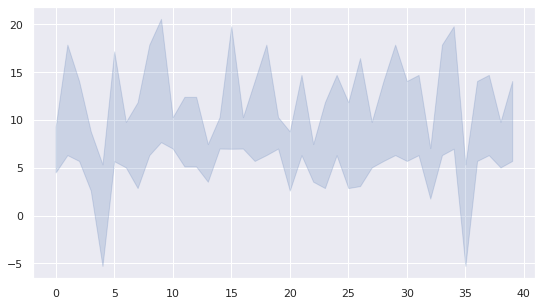

In [58]:
sns.set()
x = np.arange(len(nash_lower_bound_all_ep))

plt.fill_between(x, nash_lower_bound_all_rev_ep, nash_upper_bound_all_rev_ep, color='b', alpha=0.2)

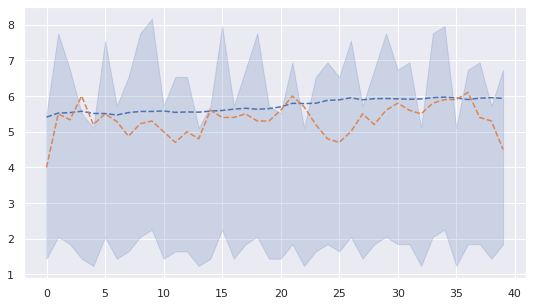

In [59]:




sns.set()
x = np.arange(len(nash_lower_bound_all_ep))

plt.plot(x, res.avg_epoch_rewards, '--', label='Average Episode Rewards')
plt.plot(x, res.avg_epoch_rewards_agent, '--', label='Reward Agent 0')
# plt.plot(x, ref_prices, 'r--', label='Ref. Price')
# plt.plot(x, avg_ag_rewards, 'r--', label='Ref. Price')
# plt.plot(x, agent_interest_action, 'o--', label='Agent 0 Price')

plt.fill_between(x, nash_lower_bound_all_ep, nash_upper_bound_all_ep, color='b', alpha=0.2)


In [60]:
# When the solid blue line in inside the fill, there is no incentive to deviate, otherwise, there is incentive, and the agents should try to undercut.

<AxesSubplot:>

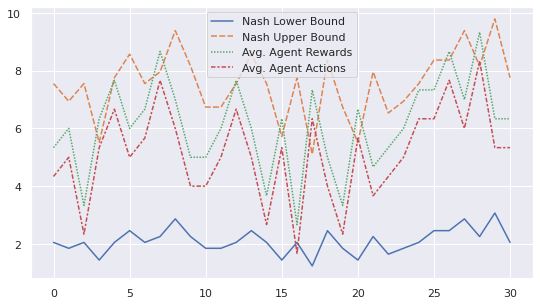

In [61]:
# "Ref Prices": ref_prices, 
nash_bound_per_run = {"Nash Lower Bound": nash_lower_bound, 
    "Nash Upper Bound": nash_upper_bound, 
    "Avg. Agent Rewards": avg_ag_rewards, 
    "Avg. Agent Actions": avg_ag_actions}
nash_bound_per_run_df = pd.DataFrame(data=nash_bound_per_run)

sns.set(rc={'figure.figsize':(9, 5)})
sns.lineplot(data=nash_bound_per_run_df)

In [62]:
nash_bound_per_run_df

,Nash Lower Bound,Nash Upper Bound,Avg. Agent Rewards,Avg. Agent Actions
0,2.048776,7.553469,5.333333,4.333333
1,1.844898,6.941837,6.000000,5.000000
2,2.048776,7.553469,3.333333,2.333333
3,1.437143,5.514694,6.333333,5.333333
4,2.048776,7.757347,7.666667,6.666667
5,2.456531,8.572857,6.000000,5.000000
6,2.048776,7.553469,6.666667,5.666667
7,2.252653,7.961224,8.666667,7.666667
8,2.864286,9.388367,7.000000,6.000000
9,2.252653,8.165102,5.000000,4.000000


In [63]:
res.episode_rewards[0]

array([[ 2., 10.,  3.],
       [ 4.,  7.,  8.],
       [ 5.,  7.,  5.],
       [10.,  4., 10.],
       [ 5.,  8.,  7.],
       [ 3.,  3.,  2.],
       [ 7.,  7.,  1.],
       [ 1.,  2.,  8.],
       [ 2.,  2.,  2.],
       [ 6.,  4.,  5.],
       [ 5.,  2.,  5.],
       [ 3.,  5.,  2.],
       [ 5.,  8.,  9.],
       [ 4.,  7.,  1.],
       [ 8.,  5.,  6.],
       [ 4., 10.,  9.],
       [ 8., 10.,  6.],
       [ 9.,  7.,  1.],
       [10.,  5.,  3.],
       [ 9.,  4.,  7.],
       [ 5.,  5., 10.],
       [ 4.,  8.,  6.],
       [ 7.,  4.,  6.],
       [ 1.,  8.,  8.],
       [ 8.,  3.,  2.],
       [ 8.,  5., 10.],
       [ 1.,  4.,  8.],
       [ 8.,  6.,  2.],
       [ 4.,  8.,  2.],
       [ 3.,  7.,  2.],
       [ 4.,  8.,  1.]])

In [64]:
state_key = [0.0, 0.0, 0.0, 3.0]

res.sna_policy_dict_iter[repr(state_key)][0]

In [65]:
max_p = 0
agent_id = 0
for x in range(10):
    p = res.sna_policy_dict_iter[repr(state_key)][agent_id][x]
    if p > max_p:
        max_p = p
        max_x = x
    print(p)
print(max_x)

0.11662893549576447
0.14731601426120833
0.1218625371082422
0.15165801602028536
0.13653342308245098
0.014237226725566479
0.07727769778844497
0.07392711571640169
0.04455900625737145
0.11600002754426396
3


In [66]:
max_p = 0
agent_id = 1
for x in range(10):
    p = res.sna_policy_dict_iter[repr(state_key)][agent_id][x]
    if p > max_p:
        max_p = p
        max_x = x
    print(p)
print(max_x)
    

0.00037144556280745746
0.2589119425696934
0.1402698593525867
0.12896727007362208
0.08765543735123794
0.11800870266985619
0.01450953202051488
0.09866801098765972
0.07986098658490691
0.07277681282711458
1


In [67]:
max_p = 0
agent_id = 2
for x in range(10):
    p = res.sna_policy_dict_iter[repr(state_key)][agent_id][x]
    if p > max_p:
        max_p = p
        max_x = x
    print(p)
print(max_x)
    

0.15789810558203024
0.09302496068981235
0.0826638007294199
0.04503734848899209
0.12037695661419129
0.10633329916358843
0.06467789584304533
0.10625586848070337
0.09416841790899995
0.1295633464992172
0
